<h1 style='color: green; font-size: 36px; font-weight: bold;'>Análise de perfil e Classificação de Churn dos Clientes 👥</h1>

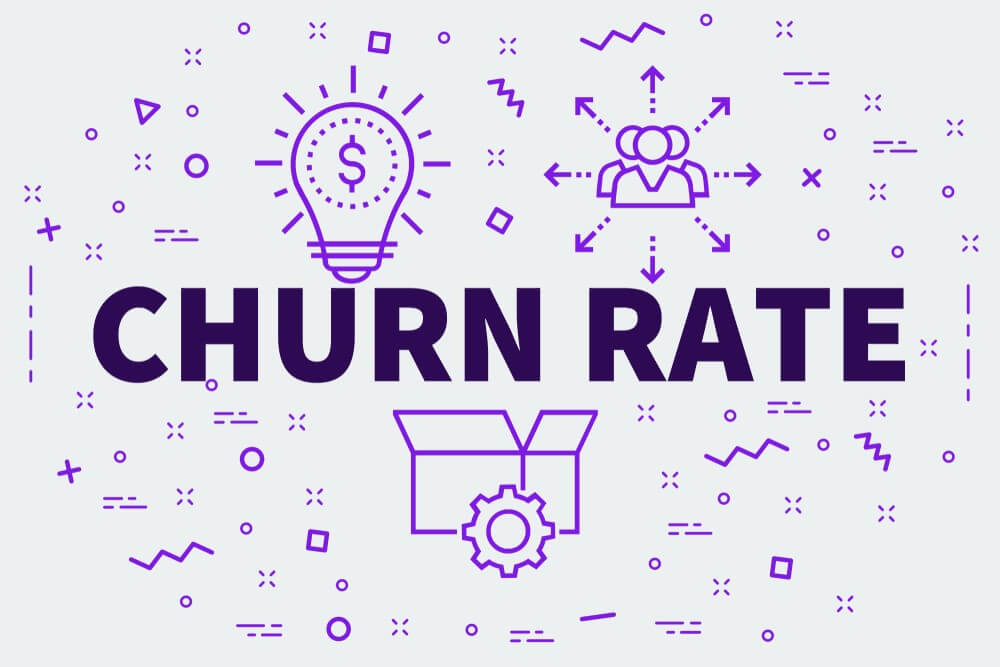

<h1 style='color: red; font-size: 30px; font-weight: bold;'>Problema de Negócio 🤝</h1>

🗣 Churn é uma métrica utilizada para mostrar o número de clientes que cancelam serviço em um determinado período de tempo. Ela é importante pois ajuda a medir a expansão da sua empresa, já que é preciso que o número de novos negócios exceda esse indicador.

👉 O principal ponto deste case é classificar os clientes de um banco em Clientes que irão permanecer no banco (Existing Customer) e os que podem sair, ou seja realizando o Churn (Attrited Customer), baseado em suas informações.

👉 Utilizarei o algoritmo SVC (Support Vector Classifier) para a criação de um modelo de Machine Learning que possa realizar esta classificação.

<h1 style='color: red; font-size: 30px; font-weight: bold;'>SUMÁRIO 📖</h1>

## 👉 1) Importando as Bibliotecas 💻
## 👉 2) Leitura do dataset 📂
## 👉 3) Limpeza e análise dos dados 📃
## 👉 4) Análises e Extração de Insights 💡
## 👉 5) Pré processamento dos dados, construção e avaliação do modelo 🤖 
## 👉 6) Conclusão 🎉

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>1) Importando as Bibliotecas 💻</h1>

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
from matplotlib.colors import ListedColormap
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>2) Leitura do dataset 📂</h1>

* #### Features


* CLIENTNUM: ID do cliente.
* Customer_Age: Idade do cliente.
* Gender: Gênero - M e F.
* Dependent_count: Número de dependentes - 0 à 5.
* Education_Level: Nível educacional - Graduated, High School, Other.
* Marital_Status: Status de matrimônio - Married, Single, Divorced, Unknown.
* Income_Category: Renda anual (dólares) - < 40K, 40K - 60K, 60K - 80K, 80K-120K, >120k.
* Card_Category: Categoria do cartão - Blue, Silver, Gold, Platinum.
* Months_on_book: Período de relação com o Banco.
* Total_Relationship_Count: Número total de produtos que o cliente possui com o banco.
* Months_Inactive_12_mon: Número de meses que o cliente esteve inativo nos últimos 12 meses (ou último ano).
* Contacts_Count_12_mon: Número de contatos que o banco teve com o cliente nos últimos 12 meses (ou último ano).
* Credit_Limit: Limite de crédito do cartão. 
* Total_Revolving_Bal: Total de Empréstimos de emergência
* Avg_Open_To_Buy: Abertura média para adquirir uma linha de crédito nos últimos 12 meses (ou último ano).
* Total_Amt_Chng_Q4_Q1: Mudança na quantia de transação entre o quarto trimestre o primeiro.
* Total_Trans_Amt: Quantia total de transação dos últimos 12 meses (ou último ano).
* Total_Trans_Ct: Quantidade total de transação dos últimos 12 meses (ou último ano).
* Total_Ct_Chng_Q4_Q1: Mudança na quantidade de transação entre o quarto trimestre o primeiro.
* Avg_Utilization_Ratio: Taxa média de utilização do cartão de crédito (0 à 1, ou 0% à 100% de uso).


* #### Target


* Attrition_Flag: Variável categória target: Existing Customer - 0 e Attrited Customer - 1

In [2]:
# Setar a opção de visualização para todas as colunas
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
del df ['CLIENTNUM']
del df ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [5]:
linhas = df.shape[0]
colunas = df.shape[1]

print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 10127 linhas e 20 colunas


<h1 style='color: blue; font-size: 30px; font-weight: bold;'>3) Limpeza e análise dos dados 📃</h1>

👉 Para que o modelo performe muito bem é ideal que o dataset esteja limpo e puro, as vezes um dataset bem transformado já resolve qualquer problema de performance complexo que o modelo precisa passar para ser reajustado.

👉 Para isso é ideal retirar valores duplicados ou nulos que possam atrapalhar a performance de precisão do modelo (veficar antes se é necessário simplesmente deletar os valores. Alguns casos é necessário mantê-los ou até mesmmo substituir por algum outro valor que sejá útil. Por exemplo: se tivessemos valores nulos de renda e é indispensável a participação deste dado no modelo, então seria interessante preenche-lo com a mediana dos valores).

👉 Além da limpeza também irei realizar Feature Engineering dos dados e o PCA para reduzir a dimensionalidade dos dados sem perder as informações importantes.

* #### Dados Duplicados:

In [15]:
duplicados = df.duplicated().sum()

print('A base de dados tem %s dados duplicados' %(duplicados))

A base de dados tem 0 dados duplicados


* #### Dados Nulos

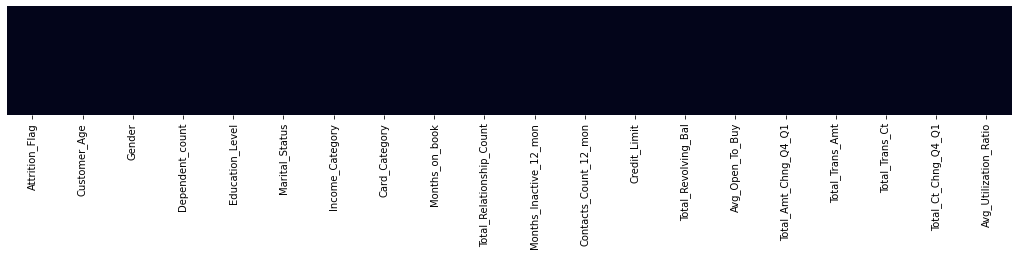

In [16]:
# Checando valores nulos
plt.figure(figsize=(18,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);

In [17]:
nulos = df.isnull().sum()

print('A base de dados tem %s dados nulos' %(nulos))

A base de dados tem Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64 dados nulos


* #### Dados Categóricos x Dados Numéricos quantitativos

In [26]:
# Verificando Valores Únicos
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [27]:
continuous =  ['Customer_Age','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit',
               'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
               'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']

categorical = ['Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category']

In [28]:
df[continuous].head()

,Customer_Age,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Relationship_Count
0,45,39,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,5
1,49,44,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,6
2,51,36,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,4
3,40,34,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,3
4,40,21,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,5


In [29]:
df[categorical].head()

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,3,High School,Married,$60K - $80K,Blue
1,F,5,Graduate,Single,Less than $40K,Blue
2,M,3,Graduate,Married,$80K - $120K,Blue
3,F,4,High School,Unknown,Less than $40K,Blue
4,M,3,Uneducated,Married,$60K - $80K,Blue


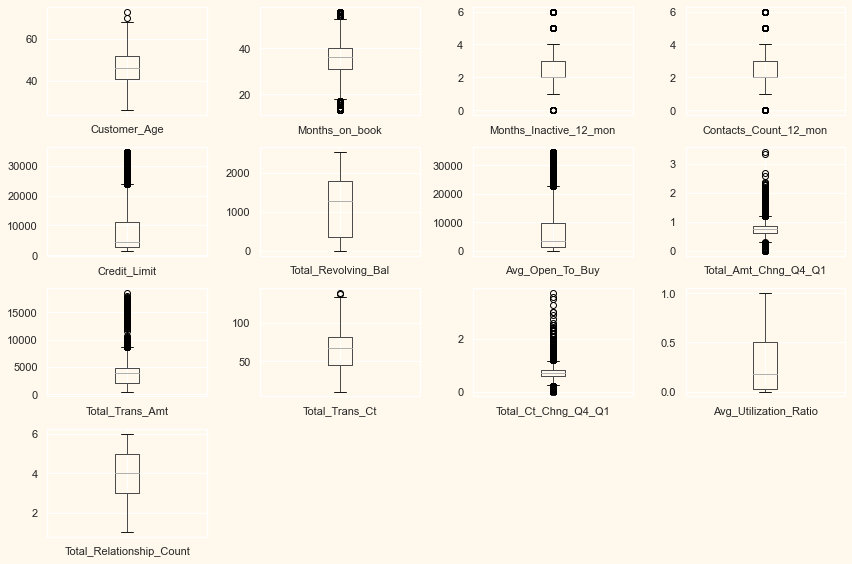

In [31]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(4, 4, i + 1);
    df.boxplot(col);
    plt.tight_layout()

👉 Há algumas colunas com outliers muito distantes da mediana como por exemplo: Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, e Total_Ct_Chng_Q4_Q1.

Passando os dados para logaritmo

In [34]:
continuous_new =  ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Ct_Chng_Q4_Q1']

In [36]:
df[continuous_new].head()

,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1
0,12691.0,11914.0,1.335,1144,1.625
1,8256.0,7392.0,1.541,1291,3.714
2,3418.0,3418.0,2.594,1887,2.333
3,3313.0,796.0,1.405,1171,2.333
4,4716.0,4716.0,2.175,816,2.500


In [37]:
# Transformação de log nas variáveis contínuas
df[continuous_new] = np.log1p(1 + df[continuous_new])

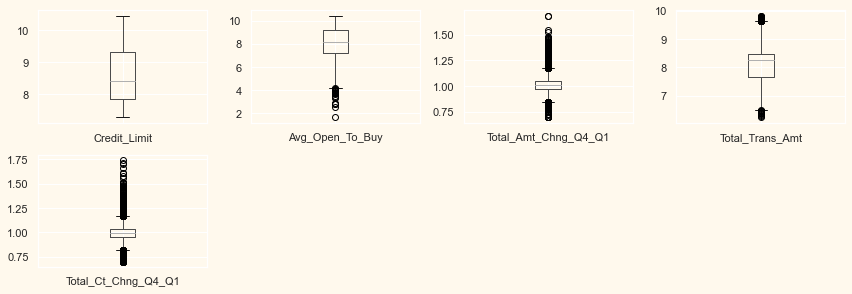

In [39]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i,col in enumerate(continuous_new):
    plt.subplot(4,4,i+1);
    df.boxplot(col);
    plt.tight_layout()

👉 Mesmo com o devido tratamento algumas variáveis possuem outliers muito distantes da mediana, portanto é ideal aplicar um tratamento de padronização nos dados, de forma que o modelo não performe de maneira inadequada.

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>4) Análises e Extração de Insights 💡</h1>

In [6]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

* #### Coluna Target

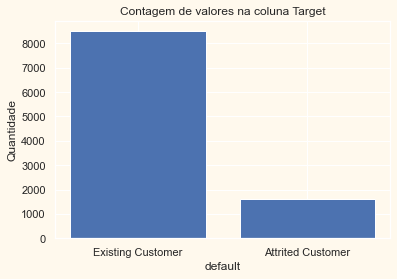

In [24]:
# contando a quantidade de valores na coluna "Attrition_Flag"
target_counts = df['Attrition_Flag'].value_counts()

# criando o gráfico de barras
plt.bar(target_counts.index, target_counts.values)

# adicionando rótulos
plt.xticks([0, 1], ['Existing Customer', 'Attrited Customer'])
plt.xlabel('default')
plt.ylabel('Quantidade')
plt.title('Contagem de valores na coluna Target')

# exibindo o gráfico
plt.show()

In [63]:
df['Attrition_Flag'].value_counts(normalize = True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

👉 83% dos clientes são dados como clientes que irão permanecer no banco, e 16% são os que realizaram Churn. 

* #### Educação

<AxesSubplot:title={'center':'Contagem dos níveis de Educação'}, xlabel='Education_Level', ylabel='count'>

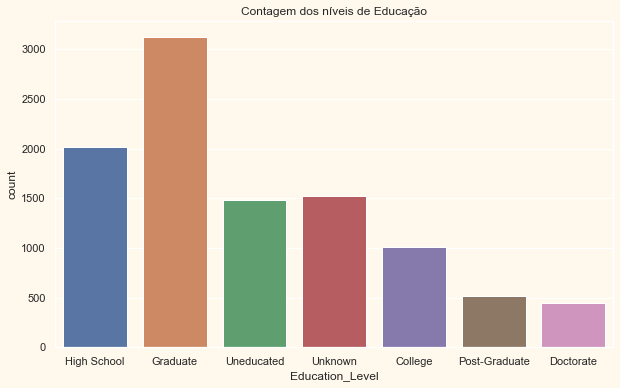

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Contagem dos níveis de Educação")
plt.ylabel("Contagem")
plt.xlabel("Níveis de Educação")
sns.countplot(df['Education_Level'])

In [61]:
df['Education_Level'].value_counts(normalize = True)*100

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

👉 Podemos ver que O banco possui 30% dos clientes graduados e 30% Com status desconhecido e/ou com status sem educação.

* #### Renda

<AxesSubplot:title={'center':'Frequência de renda por faixa'}, xlabel='Income_Category', ylabel='count'>

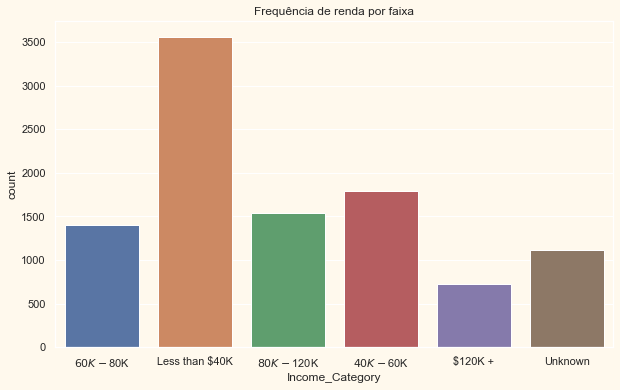

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Frequência de renda por faixa")
plt.ylabel("Contagem")
plt.xlabel("Faixas renda")
sns.countplot(df['Income_Category'])

In [83]:
df['Income_Category'].value_counts(normalize = True)*100

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

👉 Podemos ver que grande parte dos clientes (35%) possui uma renda anual menor que 40k dólares.

👉 Um pouco mais da metade de seus clientes (52%) possuem uma renda anual de no máximo 60k dólares, sendo considerado um público de renda menor que a média americana (70k dólares anuais). Fonte: Indeed.

* #### Status de casamento

<AxesSubplot:title={'center':'Contagem dos status de casamento'}, xlabel='Marital_Status', ylabel='count'>

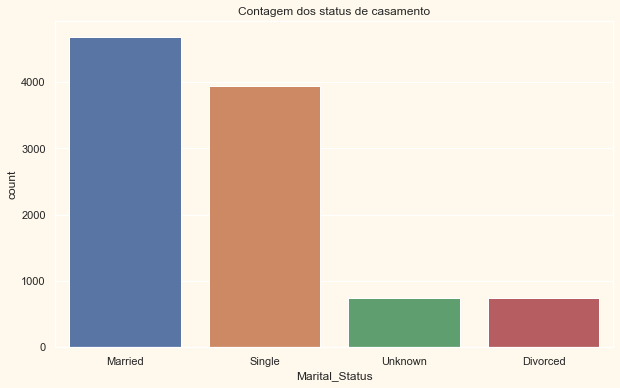

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Contagem dos status de casamento")
plt.ylabel("Contagem")
plt.xlabel("Tipos")
sns.countplot(df['Marital_Status'])

In [66]:
df['Marital_Status'].value_counts(normalize = True)*100

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

👉 46% dos clientes são casados, e 38% são solteiros, sendo um número bem próximo um do outro, apresentando um público misto. Com isso vemos que o banco não distingue os clientes dessa forma.

* #### Tipo de Cartão

<AxesSubplot:title={'center':'Contagem dos tipos de cartão'}, xlabel='Card_Category', ylabel='count'>

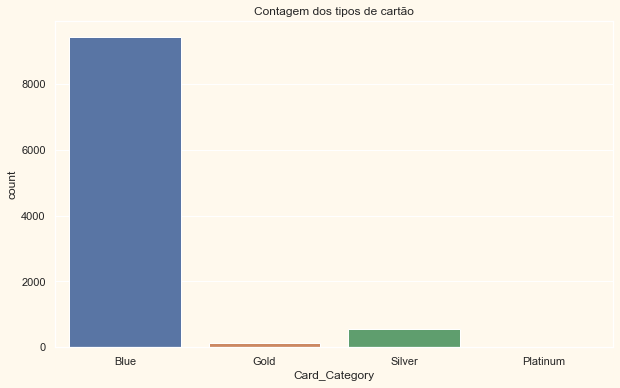

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Contagem dos tipos de cartão")
plt.ylabel("Contagem")
plt.xlabel("Cartões")
sns.countplot(df['Card_Category'])

In [70]:
df['Card_Category'].value_counts(normalize = True)*100

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

👉 Podemos ver que imensa maioria do público possui o cartão tipo Blue, que provavelmente é o mais comum. Sendo o Platinum o mais exclusivo do banco, provavelmente focado em clientes com alta renda.

* #### Months on book

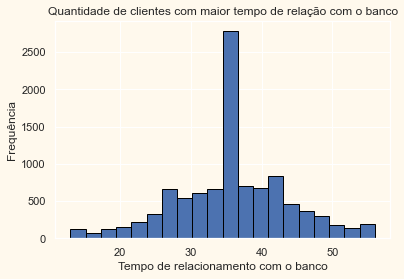

In [86]:
plt.hist(df['Months_on_book'], bins=20, edgecolor='black')
plt.xlabel('Tempo de relacionamento com o banco')
plt.ylabel('Frequência')
plt.title('Quantidade de clientes com maior tempo de relação com o banco')
plt.show()

In [87]:
df['Months_on_book'].median()

36.0

👉 Podemos ver que o período de relação com o banco possui uma mediana de 36 meses. Então metade dos clientes possui menos que 36 meses e a outra metade mais que 36 meses, isso são 3 anos no mesmo banco.

In [89]:
df_copy = df.copy()

In [90]:
df_copy['Faixas_relacionamento'] = pd.qcut(df_copy['Months_on_book'], 2, labels=["<3 anos", "> 3 anos"])

In [103]:
bins = [0,12,24,36,60]
df_copy['Faixas_relacionamento'] = pd.cut(df_copy['Months_on_book'], bins=bins, labels=["<1 ano", "> 1-2 anos", "2-3 anos", ">3 anos"])

In [104]:
pd.crosstab(df_copy['Faixas_relacionamento'], df_copy['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Faixas_relacionamento,,
> 1-2 anos,126,721
2-3 anos,871,4547
>3 anos,630,3232


👉 Na questão do Churn, podemos ver que há um número maior de evasão nos clientes com 2-3 anos de banco, e um com mais de 3 anos bem próximo (16% em ambos contra 14% dos clientes recentes). Portanto o banco precisa recuperar e oferecer produtos para os clientes de longa data.

* #### Produtos

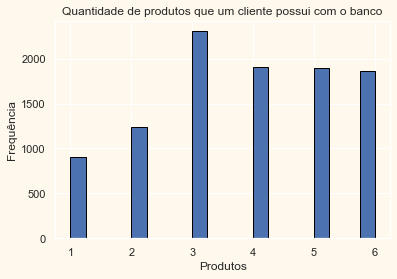

In [112]:
plt.hist(df['Total_Relationship_Count'], bins=20, edgecolor='black')
plt.xlabel('Produtos')
plt.ylabel('Frequência')
plt.title('Quantidade de produtos que um cliente possui com o banco')
plt.show()

In [109]:
bins = [0,1,2,3,4,5,6]
df_copy['Faixas_produtos'] = pd.cut(df_copy['Total_Relationship_Count'], bins=bins, 
                                    labels=["0-1", "1-2", "2-3", "3-4","4-5","5-6"])

In [110]:
pd.crosstab(df_copy['Faixas_produtos'], df_copy['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Faixas_produtos,,
0-1,233,677
1-2,346,897
2-3,400,1905
3-4,225,1687
4-5,227,1664
5-6,196,1670


👉 Vemos que os clientes com mais produtos são os que menos estão realizando Churn. Outra estratégia é o banco oferecer mais produtos interessantes de acordo com o seu apetite de risco e que interesse o cliente em continuar com o banco, desde um limite maior até um empréstimo com baixas taxas.

* #### Taxa de uso médio do cartão

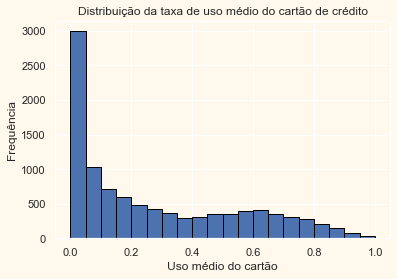

In [78]:
plt.hist(df['Avg_Utilization_Ratio'], bins=20, edgecolor='black')
plt.xlabel('Uso médio do cartão')
plt.ylabel('Frequência')
plt.title('Distribuição da taxa de uso médio do cartão de crédito')
plt.show()

👉 Um insight interessante é que podemos ver que há muitos clientes do banco que utilizam o cartão em pouca quantidade. Como o índice mede de 0.0 à 1.0, a grande maioria está abaixo de 0.4.

* #### Limite do cartão

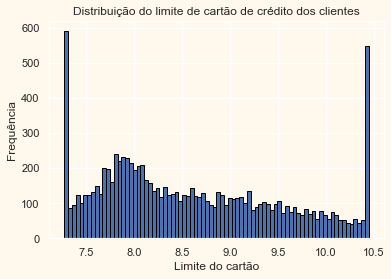

In [116]:
plt.hist(df['Credit_Limit'], bins=80, edgecolor='black')
plt.xlabel('Limite do cartão')
plt.ylabel('Frequência')
plt.title('Distribuição do limite de cartão de crédito dos clientes')
plt.show()

In [121]:
df_copy['Faixas_limite'] = pd.qcut(df_copy['Credit_Limit'], 4, labels=["7.27k-7.84k","7.84k-8.42k","8.42k-9.31k","9.31k-10.44k"])

In [122]:
pd.crosstab(df_copy['Faixas_limite'], df_copy['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Faixas_limite,,
7.27k-7.84k,517,2018
7.84k-8.42k,354,2177
8.42k-9.31k,387,2142
9.31k-10.44k,369,2163


👉 Podemos ver que quanto maior o limite do cartão de crédito, menor a taxa de Churn, ou seja, aumentar o limite do cartão pode manter o cliente no banco, uma vez que o mesmo não precisaria ir atrás do concorrente buscar um limite maior.

<h1 style='color: blue; font-size: 28px; font-weight: bold;'>5) Pré processamento dos dados, construção e avaliação do modelo 🤖</h1>

* #### LabelEncoder

👉 Primeiro passo é aplicar o LabelEncoder para realizar o processo de Feature Engineering e deixar todos os dados categóricos em dados numéricos que o modelo entenda melhor.

In [7]:
df_copy = df.copy()

In [8]:
continuous =  ['Customer_Age','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit',
               'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
               'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count']

categorical = ['Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Attrition_Flag']

In [9]:
df_copy[categorical].head()

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,3,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,5,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,3,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,4,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,3,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [10]:
#Função que coleta cada coluna categorica e transforma ela com o auxilio da função LabelEncoder()
for col in categorical:
    lb = LabelEncoder()
    
    df_copy[col] = lb.fit_transform(df_copy[col])
    
# Remove valores missing eventualmente gerados
    df_copy.dropna(inplace = True)

In [11]:
df_copy.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
# criando um dicionário para inverter os valores
mapeamento = {1: 0, 0: 1}

# aplicando o mapeamento na coluna desejada
df_copy['Attrition_Flag'] = df_copy['Attrition_Flag'].map(mapeamento)

In [13]:
df_copy['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

* #### Balanceamento da Variável Target

👉 Segundo passo é balancear a variável Target, para evitar que o modelo sofra um viés por treinar apenas com dados de uma variável mais balanceada que a outra

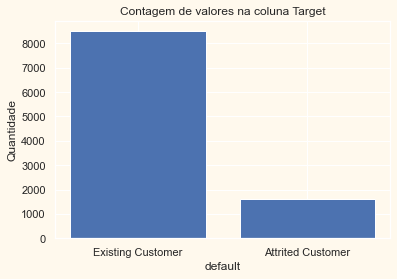

In [139]:
# contando a quantidade de valores na coluna "Attrition_Flag"
target_counts = df['Attrition_Flag'].value_counts()

# criando o gráfico de barras
plt.bar(target_counts.index, target_counts.values)

# adicionando rótulos
plt.xticks([0, 1], ['Existing Customer', 'Attrited Customer'])
plt.xlabel('default')
plt.ylabel('Quantidade')
plt.title('Contagem de valores na coluna Target')

# exibindo o gráfico
plt.show()

In [14]:
# Importa a função SMOTE que gera o oversampling
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado do estudo
seed = 100

# Dividindo em X e Y para que o algoritmo entenda quais são as categóricas target e quais não são
X = df_copy.drop('Attrition_Flag', axis=1)
y = df_copy['Attrition_Flag']

# Cria o 'modelo' balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

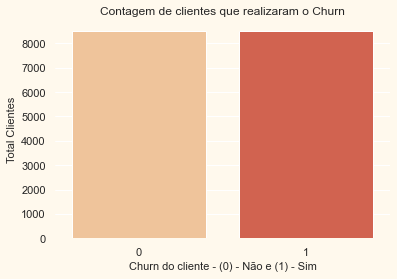

In [15]:
# Plot 
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Churn do cliente - (0) - Não e (1) - Sim', fontsize = 11)
plt.ylabel('Total Clientes', fontsize = 11)
plt.title('Contagem de clientes que realizaram o Churn')
plt.show()

In [16]:
# Shape dos dados originais
df.shape

(10127, 20)

In [17]:
# Shape dos dados reamostrados 
X_res.shape

(17000, 19)

In [18]:
# Shape dos dados reamostrados 
y_res.shape

(17000,)

#### Separando em X e y

In [19]:
X = X_res
y = y_res

In [20]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

* #### Padronização de todos os dados

👉 Por fim, para melhorar o desempenho de performance do modelo e reduzir consideravelmente o tempo de processamento, os dados devem ser todos padronizados

In [21]:
#Instanciando o modelo de Scalonamento padrão
sc = StandardScaler()

#Transformando os dados de Treino e teste 
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

In [22]:
X_treino_scaled

array([[ 0.9145517 , -0.78120687,  2.29684015, ...,  2.82454186,
         0.85250087,  0.74055159],
       [ 0.64136616, -0.78120687, -1.81985681, ..., -1.4572818 ,
         1.07916007, -0.82760689],
       [-0.45137596,  1.28007067, -0.17317802, ...,  0.6390277 ,
         0.1807753 , -0.70836903],
       ...,
       [-0.58796872, -0.78120687,  1.47350076, ...,  0.77283469,
         1.51561458,  1.58966967],
       [-0.86115425,  1.28007067,  0.65016137, ..., -0.65443987,
        -1.44686743,  0.90314867],
       [ 1.05114446, -0.78120687,  0.65016137, ..., -1.10046316,
        -0.80880707,  1.52005773]])

In [23]:
X_teste_scaled

array([[ 0.9145517 , -0.78120687,  0.65016137, ..., -0.74364452,
        -0.24081367, -0.82760689],
       [ 1.46092276, -0.78120687, -0.99651742, ...,  0.59442537,
        -0.24551208,  1.50295123],
       [-0.72456149,  1.28007067,  0.65016137, ..., -0.78824685,
        -0.70926992, -0.82760689],
       ...,
       [ 0.5047734 ,  1.28007067,  0.65016137, ..., -0.83284918,
        -1.24567444, -0.82760689],
       [ 0.23158787,  1.28007067,  0.65016137, ..., -1.23427015,
        -1.14975805,  0.31057266],
       [-0.99774702,  1.28007067, -0.99651742, ...,  0.05919741,
        -0.34454855,  1.05851921]])

* ### Modelo SVC (kernel = Linear)

#### 👉 Criando o modelo

In [24]:
modelo_v1 = svm.SVC(kernel = 'linear')

#### 👉 Treinando o modelo

In [25]:
modelo_v1.fit(X_treino_scaled, y_treino)

SVC(kernel='linear')

#### 👉 Previsões com o modelo

In [26]:
previsoes_v1 = modelo_v1.predict(X_teste_scaled)

#### 👉 Métricas do modelo

In [30]:
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acurácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [32]:
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.8712715855572999,
 'Recall': 0.8736717827626919,
 'F1 Score': 0.8724700334053842,
 'Acurácia': 0.8727450980392157,
 'AUC': 0.8727439432488694}

* ### Modelo SVC com otimização de parâmetros utilizando GridSearch e kernel RBF

👉 Com a ajuda do GridSearch será possível utilizar os melhores parâmetros do modelo SVC e achar o melhor valor de C e gamma

👉 Para maior precisão: maior o valor de C, que se relaciona com a distância da margem. Maior o C, menor a margem.

👉 Gamma é o inverso do raio de influência das amostras selecionadas pelo modelo. Ou seja, menor gama, maior o raio de influência do ponto.

#### 👉 Criando modelo com GridSearch

In [35]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = 'rbf')

# Valores para o grid (hiperparâmetro Gamma e C)
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros (ele pega os valores e cria um dicionário que será passado ao modelo)
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search - Aqui o modelo grid será testado no modelo SVM(2) e passará cada um dos parâmetros do dicionário
modelo_v2_grid_search_rbf = GridSearchCV(modelo_v2, svm_param_grid, cv = 3)

# Treinamento do modelo SVM com o parâmetro escolhido acima
modelo_v2_grid_search_rbf.fit(X_treino_scaled, y_treino)

# Acurácia em Treino do modelo
print(f"Acurácia em Treinamento: {modelo_v2_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v2_grid_search_rbf.best_params_}")

Acurácia em Treinamento: 93.51%

Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


#### 👉 Prevendo os dados

In [37]:
previsoes_v2 = modelo_v2_grid_search_rbf.predict(X_teste_scaled)

In [38]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'kernel = RBF e uso dos GridSearch',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [39]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'kernel = RBF e uso dos GridSearch',
 'Precision': 0.9391679748822606,
 'Recall': 0.9373286329808069,
 'F1 Score': 0.938247402470104,
 'Acurácia': 0.9382352941176471,
 'AUC': 0.9382360250586852}

#### 👉 Utilizando o GridSearch conseguimos encontrar os melhores parâmetros possíveis e melhorar o modelo de SVC

* ### Modelo SVC com otimização de parâmetros utilizando GridSearch e kernel Polinomial

👉 Como estamos utilizando o kernel polinomial, devemos passar os parâmetros d e r que pertencem a equação polinomial do modelo, bem como o próprio gamma citado anteriormente

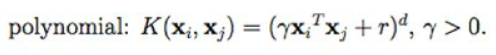

In [42]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'poly')

# Valores para o grid (range) com agora o r_range e d_range
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
modelo_v3_grid_search_poly = GridSearchCV(modelo_v3, param_grid_poly, cv = 3)

# Treinamento
modelo_v3_grid_search_poly.fit(X_treino_scaled, y_treino)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_poly.best_params_}")

Acurácia em Treinamento: 93.09%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


#### 👉 Prevendo os dados

In [43]:
previsoes_v3 = modelo_v3_grid_search_poly.predict(X_teste_scaled)

In [50]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_teste),
               'Recall':recall_score(previsoes_v3, y_teste),
               'F1 Score':f1_score(previsoes_v3, y_teste),
               'Acurácia':accuracy_score(previsoes_v3, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v3)}

In [51]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.9434850863422292,
 'Recall': 0.9314219294846958,
 'F1 Score': 0.9374147007213881,
 'Acurácia': 0.9370588235294117,
 'AUC': 0.9370638597855346}

<h1 style='color: blue; font-size: 32px; font-weight: bold;'>6) Conclusão 🎉</h1>

👉 Utilizei o algoritmo SVC para construir 3 modelos de classificação.

👉 O melhor modelo foi o Modelo 2, uma vez que foi campeão em grande parte das métricas em relação ao modelo 3.

👉 O modelo 2 foi construido apenas utilizando o kernel RBF e usando o GridSearch para encontrar os melhores parâmetros do modelo.

👉 Para aperfeiçoar melhor ainda o modelo, poderia ter reduzido algumas features que não possuem muita importância para o modelo, porém como muitas dessas informações chegam para o banco com os novos clientes entrantes, optei por manter.

👉 Com as análises de dados feitas no ítem 4, também obtive alguns insights como por exemplo:

* Um pouco mais da metade (52%)  do público deste banco possui uma renda menor que a renda anual média de um americano (70k anual). Fonte: Indeed

* 70% do público possui alguma educação comprovadas

* Metade dos clientes possui menos que 36 meses e a outra metade mais que 36 meses, isso são mais ou menos 3 anos no mesmo banco.

* Há um número maior de evasão nos clientes com 2 à 3 anos de banco, portanto o banco deve focar sua atenção em um público mais fiel ao mesmo do que novos entrantes.

* Clientes com mais produtos são os que menos realizam Churn. O banco deve oferecer mais produtos interessantes de acordo com o seu apetite de risco e que interessem o cliente em continuar com o banco.

* Podemos ver que quanto maior o limite do cartão de crédito, menor a taxa de Churn, ou seja, aumentar o limite do cartão pode manter o cliente no banco.

In [52]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({
                       #'SVM_dict_v1':pd.Series(SVM_dict_v1),
                       'Modelo 1':pd.Series(SVM_dict_v1),
                       'Modelo 2':pd.Series(SVM_dict_v2),
                       'Modelo 3':pd.Series(SVM_dict_v3)})

In [53]:
resumo

,Modelo 1,Modelo 2,Modelo 3
Modelo,SVM,SVM,SVM
Versão,1,2,3
Kernel,Linear com Dados Padronizados,kernel = RBF e uso dos GridSearch,Polinomial com Dados Padronizados
Precision,0.871272,0.939168,0.943485
Recall,0.873672,0.937329,0.931422
F1 Score,0.87247,0.938247,0.937415
Acurácia,0.872745,0.938235,0.937059
AUC,0.872744,0.938236,0.937064


<h1 style='color: red; font-size: 32px; font-weight: bold;'>Modelo Campeão: 2️⃣</h1>